<h1>NBA Scoring Evolution: Pace, Efficiency, and the 3-Point Revolution</h1>	


<h4>Project Objective</h4>	 

This analysis investigates how and why NBA scoring has evolved from 1946 to the present. Specifically, we explore:

- Why scoring peaked in the late 1960s

- Why scoring declined through the late 1990s and early 2000s

- Why scoring surged again during the 2010s

- Whether the 3-point line immediately increased scoring


<h4>Approach</h4>	


To answer these questions, we:

- Analyze league-wide scoring trends over time

- Decompose scoring into pace (possessions) and efficiency (points per possession)

- Examine the evolution of 3-point shot adoption and its relationship to efficiency

By separating pace from efficiency, we can identify the structural drivers behind historical scoring changes rather than relying on surface level trends.



In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [57]:
games = pd.read_csv("game.csv")

In [58]:
#Scoring Evolution - how has NBA scoring changed over time, and what eras show meaningful shifts? 

#data cleaning vv

#filter to only regular season games, playoff games often have a slower pace, tighter rotations, we will analyze playoffs vs regular season later
games_reg = games[games['season_type'] == "Regular Season"].copy()

#new column to show total points in the game
games_reg['total_pts'] = games_reg['pts_home'] + games_reg['pts_away']

#create a season column using game_date so its easier to understand, since seasonid is a little confusing and game_date doesn't tell us which season we are in, so we just extract the year 
games_reg['game_date'] = pd.to_datetime(games_reg['game_date'])
games_reg['season'] = games_reg['game_date'].apply(lambda x: x.year if x.month >= 10 else x.year - 1) 


#move to season level analytics, aggregate by season instead of game to get a broader answer on how scoring has changed, and get rid of unwanted data for this part of the analysis 
season_scoring = games_reg.groupby(games_reg['season']).agg(avg_total_pts = ('total_pts', 'mean'), avg_home_pts = ('pts_home', 'mean'), avg_away_pts = ('pts_away', 'mean'), games = ('game_id', 'count'))


season_scoring.sort_values('season')
#check data to make sure it looks good before we graph 
games_reg.head()
season_scoring.head()


,avg_total_pts,avg_home_pts,avg_away_pts,games
season,,,,
1946,135.537764,69.003021,66.534743,331
1947,145.309278,73.541237,71.768041,194
1948,160.019444,81.894444,78.125000,360
1949,160.069272,83.113677,76.955595,563
1950,168.121469,87.483051,80.638418,354


** All possession and scoring metrics reflect combined totals from both teams per game. **

In [59]:
#add a 5-year rolling average -> makes for a smoother line, and comparing it to the regular per-season average can show where there are possible rule changes, addition of the 3-point line, etc. 

season_scoring['rolling5'] = season_scoring['avg_total_pts'].rolling(5, min_periods=1).mean() 

Text(0, 0.5, 'Average Total Points')

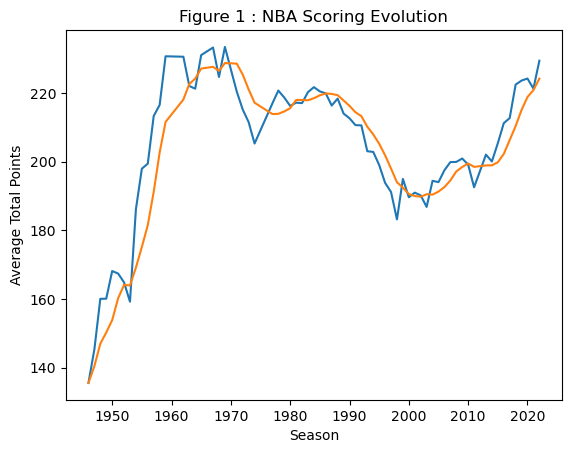

In [60]:
# graph 1 - NBA scoring evolution from 1946 - present
sns.lineplot(data = season_scoring, x= 'season', y='avg_total_pts')
sns.lineplot(data = season_scoring, x='season', y='rolling5')
plt.title("Figure 1 : NBA Scoring Evolution")
plt.xlabel("Season")
plt.ylabel("Average Total Points")


above in in the blue line is the average total points per season in the NBA, and the orange line is the rolling
5 year average of the average total points for every 5 seasons. We see a huge spike from the 1950s to the 1970s-80s,
then it dips back down until 2010, where it starts to spike again to the present day. Reasons for these inconsistencies could 
be caused by rule changes throughout the NBA, such as the addition of the 3-point line, addition of the shot clock, among others, 
so we will analyze those in the next graph by adding some vertical axis showing when certain rule changes occured. 



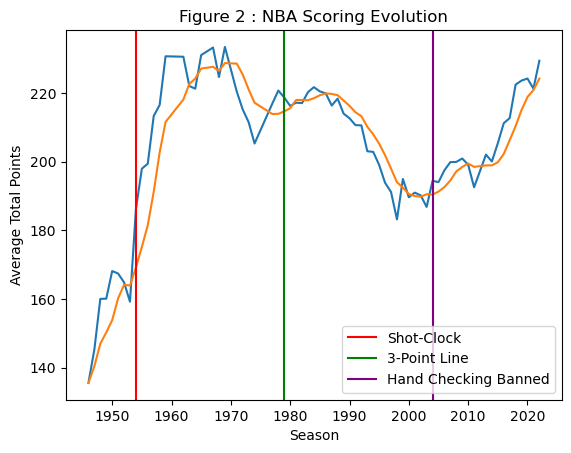

In [61]:
sns.lineplot(data = season_scoring, x= 'season', y='avg_total_pts')
sns.lineplot(data = season_scoring, x='season', y='rolling5')
plt.title("Figure 2 : NBA Scoring Evolution")
plt.xlabel("Season")
plt.ylabel("Average Total Points")



plt.axvline(x=1954, color='red', label = 'Shot-Clock')
plt.axvline(x=1979, color='green', label = '3-Point Line')
plt.axvline(x=2004, color = 'purple', label = 'Hand Checking Banned')

plt.legend()

Graph Analysis / Explanation: 

Shot Clock 

    Each team has 24 seconds per possesion to shoot the basketball and hit the rim, if they miss, the shot clock resets back to 24, and if they don't shoot the ball before the 24 second shot clock expires, it results in a turnover and the opposing team obtains possesion

    The addition of the shot clock forced teams to attempt more shots, gave both teams more possesions, and overall forced the game to become more fast paced, which could be the reason why scoring spiked from the 50s to the late 60s early 70s. 


3-Point Line Introduced

    An arcing line drawn ~ 24 feet from the basket, if a player shoots the ball from outside this line, the score counts as 3 points instead of 2, which would be shot from inside the arc

    The addition of the 3-point line is the most influencial addition to the game of basketball, completely changing how the game is played today. Not only did this give players the ability to simply score more points, but if a player / team is very good at shooting threes, it may force the opposing team to spread our their defense, covering their man higher up / closer to the three point line so the shooter doesn't get a wide open look - therefore, opening up the middle of the court. However, the graph shows something slightly different when the 3 point line was added. My intuition says that scoring would increase around this time, but it actually decreases by quite a bit. Later, we will dive into this deeper and see if the 3-point line actually caused this decrease in scoring, or if it was something unrelated. 


Hand Checking

    Hand Checking is a (now illegal) defensive 'strategy' where the defensive player will use their hands / forearms to 'check' the offensive player, impending their movement, speed, and balance. 

    Before hand checking was banned in 2004, almost every player used it to their advantage, and this made the game very physical, and scoring was much more difficult because of how tough the defense was. This could be a reason why scoring dipped from the 80s to the 00 - players started to use it more and more and refs wern't sure when to call it a foul and let it slide because hand checking was legal. After the banning of hand checking, defense became 'lighter' because the defensive player wasn't always keeping a hand or forearm on the offensive player, stopping them from scoring. It also started to force defensive players to not gaurd players so close, because without hand checking, the offensive player can drive right by the defensive player a lot easier. This could be the reason for the drastic shift in scoring after the ban. 


In [62]:
#Why didn't scoring increase after the implementation of the 3-point line?

games_reg['total_3pt_m'] = games_reg['fg3m_home'] + games_reg['fg3m_away']
games_reg['total_3pt_a'] = games_reg['fg3a_home'] + games_reg['fg3a_away']

temp = games_reg.groupby(games_reg['season']).agg(avg_total_3_a = ('total_3pt_a', 'mean'), avg_total_3_m = ('total_3pt_m', 'mean')).reset_index()

season_3pt = temp[temp['season'] > 1980].copy()

season_3pt.head()

,season,avg_total_3_a,avg_total_3_m
29,1981,4.530973,1.194062
30,1982,4.259259,1.071050
31,1983,3.851852,1.187699
32,1984,6.253165,1.772004
33,1985,6.661718,1.881230


Text(0.5, 1.0, 'Figure 3 : Seasonal Average Total Threes Made (blue) vs Attempted (red)')

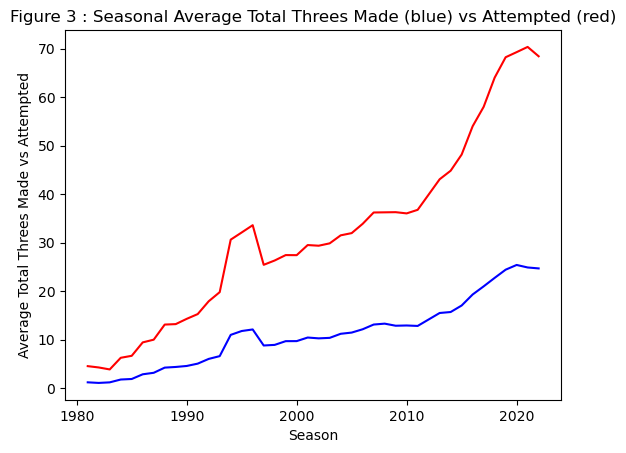

In [63]:
#graph seasonal 3pt data - this might help us understand the dip in scoring after the 3 point line was added

sns.lineplot(data = season_3pt, x = 'season', y = 'avg_total_3_a', color = 'red')
sns.lineplot(data = season_3pt, x = 'season', y = 'avg_total_3_m', color = 'blue')

plt.xlabel('Season')
plt.ylabel('Average Total Threes Made vs Attempted')
plt.title('Figure 3 : Seasonal Average Total Threes Made (blue) vs Attempted (red)')

What this graph tells us is that there isn't anything that stands out as the reason why scoring dropped so much during the 80s - 00s.
Throughout that time period, teams really didn't start to really shoot 3's until the 2010s, and the 3-pt percentage really wasn't that bad, definetely 
not enough to explain the scoring drop. If anything, the huge jump in attempted threes starting in 2010 would have shown a scoring drop during that time period,
but going back to the previous 'NBA Scoring Evolution' graph, that shows a increase in scoring rather than a decrease.


So, what did cause the scoring drop in the 80s - 00s? My next hypothesis is that it could be the pace of how the game was played. To answer this question,
we can analyze number of possesions with points per possesion, and if we see a similar curve to the NBA Scoring Evolution curve, it could explain the drop in scoring. 

To analyze possesions, theres a special formula in basketball analytics that estimates how many offensive possesions a team used in a game

$possesions \approx FGA + 0.44 \cdot FTA - OREB + TOV$

to explain this equation, we have to know what a possesion actually is.

a possesion ends when : 

    - the offense shoots and the defense gets a rebound 

    - the offense commits a foul, or causes a turnover 

    - the offense makes a shot

    - the offense gets fouled and shoots 2 or 3 freethrow shots 


So, we add FGA because everytime you attempt a shot, it usually ends in a end of possesion UNLESS the offense gets an offensive rebound, in which 
the possesion continues, which is why we subtract it. We then add turnovers because after a turnover, the possesion always ends and gives the opposing team a new possesion. The tricky part is the FTA, and multiplying it with 0.44. There are a lot of instances where teams can get free throws, whether its a foul (+2 shots), a technical foul(+1 shot, no possesion change), an and-one(+1), a foul on a three (+3 shots), among others. NBA research found that on average, 44 percent of free throws attempted result in a possesion change, so we add that to our possesion equation. Now lets code and graph this and see if this caused the dip in the 80s - 00s scoring. 


In [64]:
#create a new column for number of possesions 
games_reg['#_of_poss'] = (games_reg['fga_away'] + games_reg['fga_home']) + 0.44*(games_reg['fta_away'] + games_reg['fta_home']) - (games_reg['oreb_away'] + games_reg['oreb_home']) + (games_reg['tov_away'] + games_reg['tov_home'])

games_reg['#_of_poss'].tail()

65537    226.40
65538    213.68
65539    198.40
65540    202.28
65541    204.24
Name: #_of_poss, dtype: float64

In [65]:
temp = games_reg.groupby(games_reg['season']).agg(avg_num_poss = ('#_of_poss', 'mean'), avg_pts = ('total_pts', 'mean')).reset_index()
season_possesions = temp[temp['season'] > 1980].copy()

#create a points per possesion column
season_possesions['PPP'] = (season_possesions['avg_pts'] / season_possesions['avg_num_poss'])
season_possesions.head()



,season,avg_num_poss,avg_pts,PPP
29,1981,207.285714,217.153765,1.047606
30,1982,208.957500,217.028632,1.038626
31,1983,211.093913,220.220573,1.043235
32,1984,206.831111,221.676564,1.071776
33,1985,210.630498,220.440085,1.046572


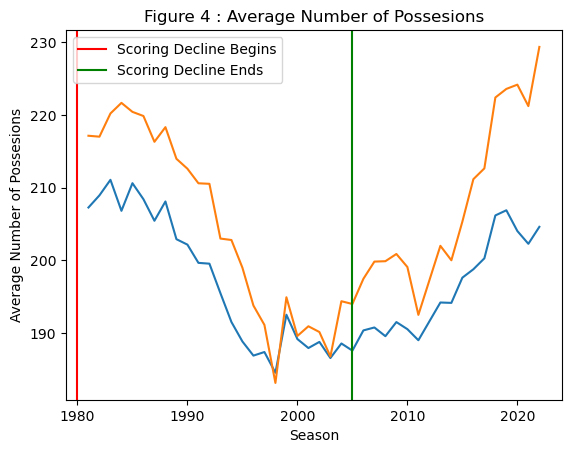

In [66]:
sns.lineplot(data = season_possesions, x = 'season', y = 'avg_num_poss')
sns.lineplot(data = season_possesions, x = 'season', y = 'avg_pts')
plt.xlabel('Season')
plt.axvline(x=1980, color='red', label = 'Scoring Decline Begins')
plt.axvline(x = 2005, color = 'green', label = 'Scoring Decline Ends')
plt.ylabel('Average Number of Possesions')
plt.title('Figure 4 : Average Number of Possesions')
plt.legend()

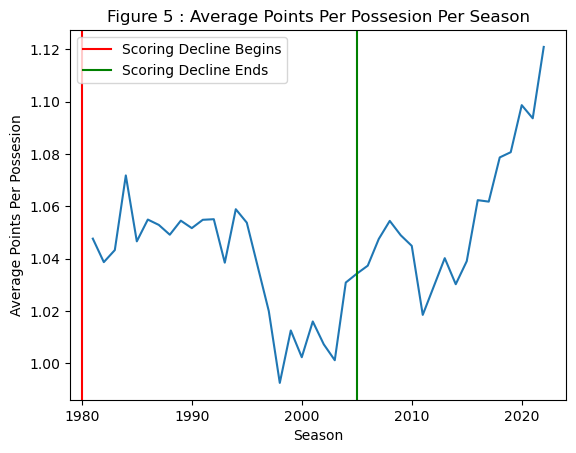

In [67]:
sns.lineplot(data = season_possesions, x = 'season', y = 'PPP')
plt.xlabel('Season')
plt.ylabel('Average Points Per Possesion')
plt.axvline(x=1980, color='red', label = 'Scoring Decline Begins')
plt.axvline(x = 2005, color = 'green', label = 'Scoring Decline Ends')
plt.title('Figure 5 : Average Points Per Possesion Per Season')
plt.legend()

What figures 4 and 5 show is a CLEAR reason for the 80s' 00's scoring decline that was shown in figure 1 and 2. Whle the scoring during the late 1990s and early 2000s aligns with a significant reduction in possessions per game, points per possession also fell during this period. This suggests that the era was characterized not only by slower pace, but also by decreased offensive efficiency. In contrast, the modern scoring surge reflects both increased pace and historically high offensive efficiency. Defenses became smarter and tougher, but so did the offense, which is why we see a decrease in number of possesions along with the decrease in points per possesion. 

As for after the 80s-00s scoring decline, what caused the huge scoring spike from 2010-current? Going back to figure 3, we see a giant spike in the number of average threes attempted per season. How did the increase in shooting threes drive the scoring increase of the current day NBA?

The 3-Point Evolution and Modern Scoring Surge : 

In [68]:
games_reg['total_fga'] = (games_reg['fga_away'] + games_reg['fga_home'])

temp = games_reg.groupby(games_reg['season']).agg(avg_3pa = ('total_3pt_a', 'mean'), avg_fga = ('total_fga', 'mean')).reset_index()

seasonal_3pt = temp[temp['season'] > 1980]

seasonal_3pt.head()


,season,avg_3pa,avg_fga
29,1981,4.530973,174.115000
30,1982,4.259259,179.227669
31,1983,3.851852,176.709438
32,1984,6.253165,178.214210
33,1985,6.661718,177.261930


In [69]:
#create a 3 points attempted rate column (how often are we shooting threes in comparison to regular shots) 

seasonal_3pt['three_pt_rate'] = seasonal_3pt['avg_3pa'] / seasonal_3pt['avg_fga']
seasonal_3pt.head()

/tmp/ipykernel_454/2994554101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_3pt['three_pt_rate'] = seasonal_3pt['avg_3pa'] / seasonal_3pt['avg_fga']


,season,avg_3pa,avg_fga,three_pt_rate
29,1981,4.530973,174.115000,0.026023
30,1982,4.259259,179.227669,0.023765
31,1983,3.851852,176.709438,0.021798
32,1984,6.253165,178.214210,0.035088
33,1985,6.661718,177.261930,0.037581


Text(0.5, 1.0, 'Figure 6 : 3 Point Attempt Rate over Time')

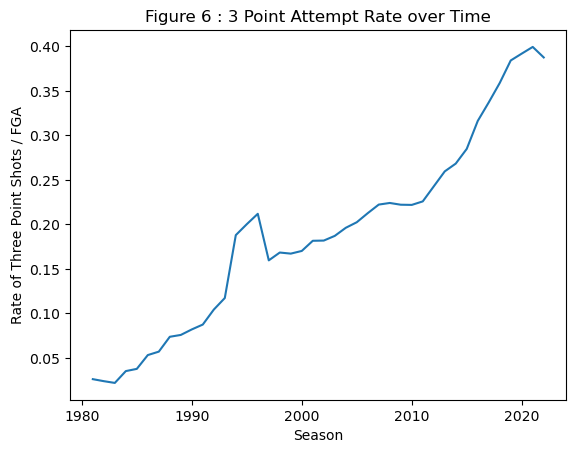

In [70]:
sns.lineplot(data=seasonal_3pt, x = 'season', y = 'three_pt_rate')
plt.xlabel('Season')
plt.ylabel('Rate of Three Point Shots / FGA')
plt.title('Figure 6 : 3 Point Attempt Rate over Time')

- gradual until a sharp inflection ~2012 and onward 
- explosive growth afterwards 

now we can test this relationship with our previous calculation of possesions with merge 

In [71]:
season_modern = season_possesions.merge(seasonal_3pt[['season', 'three_pt_rate']], on='season')

season_modern[['three_pt_rate', 'PPP']].corr()
                                       

,three_pt_rate,PPP
three_pt_rate,1.000000,0.389229
PPP,0.389229,1.000000


This shows a 0.389 correlation between points per possesion and the three point rate. This is a moderate positive relationship, telling us that as teams take more threes, offensive efficiency tends to increase. 

However, its not as strong of a correlation that I expected. 

This is because points per possesion is influenced by many many other things, like 2P%, free throw rate, pace of the game (which we proved is a huge driving facotr), shot quality, rotation adjustments, among others. 


Visual Representation 

Text(0.5, 1.0, '3-PT Rate vs Points Per Possesion')

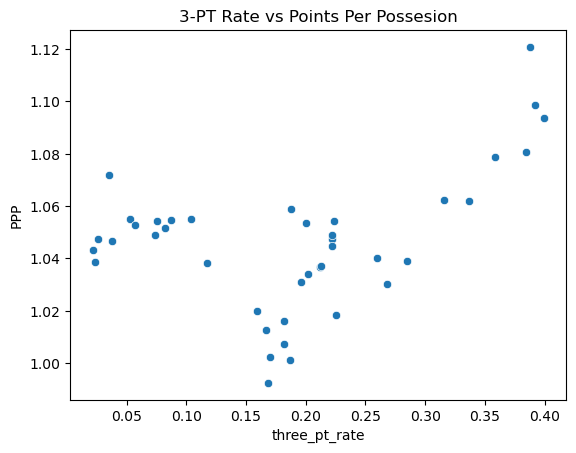

In [72]:
sns.scatterplot(data = season_modern, x = 'three_pt_rate', y = 'PPP')
plt.title('3-PT Rate vs Points Per Possesion')

Reinforcing what we found from the correlation, when teams take more threes, points per possesion increase, but the correlation isnt the highest because it is influenced by other factors, which we proved previously in the analysis

<h1>Conclusion</h1>	

This analysis decomposed NBA scoring into its structural components: pace and efficiency.


Key findings:


- The late-1960s scoring peak aligned with historically high pace.

- The scoring decline of the late 1990s and early 2000s was driven by both reduced possessions and lower offensive efficiency.

- The introduction of the 3-point line in 1979 did not immediately increase scoring, as usage remained limited for decades.

- The modern scoring surge (2014–present) reflects both increased pace and a significant rise in offensive efficiency.

- Growth in 3-point attempt rate is positively associated with improvements in points per possession, suggesting that strategic shot selection, rather than rule existence alone, drove the modern scoring explosion.


Overall, this analysis demonstrates that scoring trends are best understood through structural decomposition rather than surface-level point averages. Pace, efficiency, and strategic shot selection collectively shape the evolution of the NBA game.